https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [138]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/temps.csv')
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


### 2. Lidia con las variables categóricas del dataset

In [139]:
df = pd.get_dummies(df)

In [129]:
import numpy as np
# Pasamos a array la variable que queremos predecir ('actual')
y = np.array(df['actual'])
# Eliminamos del dataframe la variable que queremos predecir y mantenemos el resto como columnas (serán las variables predictoras:X)
# axis 1 se refiere a las columnas
X= df.drop('actual', axis = 1)
# Guardamos en una lista los nombres de las columnas
X_list = list(X.columns)
# Pasamos a array la X
X = np.array(X)

In [140]:
X.shape

(348, 17)

In [141]:
y.shape

(348,)

### 3. Divide en train y test

In [142]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Dividimos los datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### 4. Entrena el modelo
Utiliza un DecisionTreeRegressor

In [143]:
%%time
# Importamos el modelo que vamos a utilizar: Random Forest Regressor
from sklearn.tree import DecisionTreeRegressor
# Iniciamos el modelo con 1000 árboles de decisión
# max_depth: profundidad máxima que puede alcanzar el árbol
# max_leaf_nodes: número máximo de nodos terminales. 
modelo = DecisionTreeRegressor(max_depth= 5, max_leaf_nodes= 10, random_state=42)
# Entrenamos el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)


Wall time: 2 ms


DecisionTreeRegressor(max_depth=5, max_leaf_nodes=10, random_state=42)

### 5. Calcula su MAE
Sin usar sklearn

In [144]:
# Utilizamos el método de predicción entrenado con los datos del grupo de test
predictions = rf.predict(X_test)
# Calculamos el error absoluto MAE
errors = abs(predictions - y_test)
# Imprimimos el error absoluto (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 4.41 degrees.


### 6. Calcula su MAPE
Sin usar sklearn

In [145]:
# Calculamos el porcentaje de error absoluto medio (MAPE)
mape = 100 * (errors / y_test)
#print("mape", mape)
# Calculamos y mostramos la precisión del modelo
accuracy = 100 - np.mean(mape) 
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 93.06 %.


### 7. Representa el árbol de decision

Profundidad del árbol: 5
Número de nodos terminales: 10


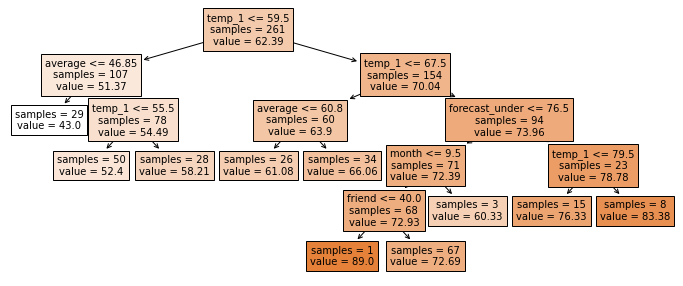

In [146]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(12, 5))

print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo,
            feature_names = X_list,
            class_names   = y,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

### 8. Modifica el max_depth a 3 y vuelve a entrenarlo

In [147]:
%%time
# Importamos el modelo que vamos a utilizar: Random Forest Regressor
from sklearn.tree import DecisionTreeRegressor
# Iniciamos el modelo con 1000 árboles de decisión
# max_depth: profundidad máxima que puede alcanzar el árbol
# max_leaf_nodes: número máximo de nodos terminales. Por defecto son 8
modelo = DecisionTreeRegressor(max_depth=3, max_leaf_nodes= None, random_state=42)
# Entrenamos el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)


Wall time: 2.92 ms


DecisionTreeRegressor(max_depth=3, random_state=42)

### 9. Vuelve a calcular si MAE

In [122]:
# Utilizamos el método de predicción entrenado con los datos del grupo de test
predictions = rf.predict(X_test)
# Calculamos el error absoluto MAE
errors = abs(predictions - y_test)
# Imprimimos el error absoluto (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 4.41 degrees.


### 10. Vuelve a representar su árbol

Profundidad del árbol: 3
Número de nodos terminales: 8


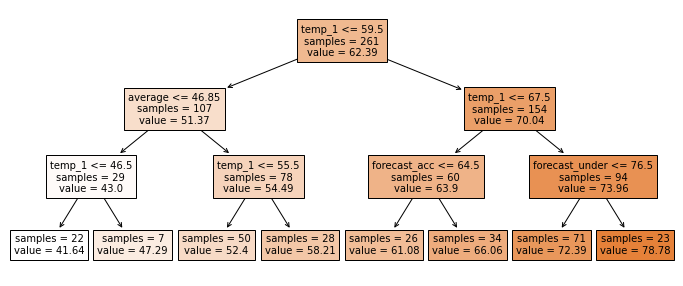

In [126]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(12, 5))

print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo,
            feature_names = X_list,
            class_names   = y,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

### 10. Obten el `feature_importances` de cada variable en el último modelo

In [125]:
importancia_predictores = pd.DataFrame(
                            {'predictor': X_list,'importancia': modelo.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
4,temp_1,0.872637
5,average,0.091943
8,forecast_under,0.023367
7,forecast_acc,0.012052
10,week_Fri,0.000000
15,week_Tues,0.000000
14,week_Thurs,0.000000
13,week_Sun,0.000000
12,week_Sat,0.000000
11,week_Mon,0.000000
